# DATA 102 Final Project

Group members: Bridget Nix, Danny Ticknor, Hannah Chea, Meer Wu

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 

# Valley Fever

In [7]:
valley_fever = pd.read_csv("valley_fever.csv")
valley_fever = valley_fever.melt(id_vars=['State', 'County','FIPS'], var_name='Date', value_name='Cases')
valley_fever['Date'] = pd.to_datetime(valley_fever['Date'], format='%Y/%m').dt.to_period('m')

valley_fever.loc[(valley_fever.State == 'AZ'),'statefips']=4
valley_fever.loc[(valley_fever.State == 'CA'),'statefips']=6
valley_fever.loc[(valley_fever.State == 'NV'),'statefips']=32
valley_fever['statefips'] = valley_fever['statefips'].astype(int)
valley_fever['countyfips'] = valley_fever['FIPS'].astype(int)
valley_fever = valley_fever.drop(columns=['FIPS'])

In [8]:
valley_fever

,State,County,Date,Cases,statefips,countyfips
0,AZ,Apache,2000-01,1,4,4001
1,AZ,Cochise,2000-01,1,4,4003
2,AZ,Coconino,2000-01,1,4,4005
3,AZ,Gila,2000-01,1,4,4007
4,AZ,Graham,2000-01,0,4,4009
...,...,...,...,...,...,...
17275,NV,Nye,2015-12,0,32,32023
17276,NV,Pershing,2015-12,0,32,32027
17277,NV,Storey,2015-12,0,32,32029
17278,NV,Washoe,2015-12,2,32,32031


# Ozone

In [9]:
ozone = pd.read_csv("ozone.csv")

In [10]:
ozone_orig = pd.DataFrame(ozone, copy=True)

In [11]:
def clean_ozone(df):
    df = df.drop('Unnamed: 0', axis=1)
    df['Date'] = pd.to_datetime(df['date']).dt.to_period('m')
    df.loc[df['statefips']==4, 'State'] = 'AZ'
    df.loc[df['statefips']==6, 'State'] = 'CA'
    df.loc[df['statefips']==32, 'State'] = 'NV'
    df = df.merge(valley_fever[['County','countyfips']].groupby(['County','countyfips']).count().reset_index(), on='countyfips')
    df = df.loc[:, ['Date', 'statefips', 'countyfips', 'ds_o3_pred', 'State', 'County']].groupby(by=['Date', 'statefips', 'countyfips', 'State', 'County']).mean().reset_index()
    return df

In [12]:
ozone = clean_ozone(ozone)

# PM

In [23]:
pm = pd.read_csv("pm.csv")

C:\Users\cheah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
pm_orig = pd.DataFrame(pm, copy=True)
pm = pd.DataFrame(pm_orig, copy=True)
pm.loc[pm.shape[0]-1, 'longitude'] = -118.25827
pm.loc[pm.shape[0]-1, 'ds_pm_pred'] = 13.9273
pm.loc[pm.shape[0]-1, 'ds_pm_stdd'] = 2.9059
def clean_pm(df):
    df = df.drop('Unnamed: 0', axis=1)
    df['Date'] = pd.to_datetime(df['date']).dt.to_period('m')
    df.loc[df['statefips']==4, 'State'] = 'AZ'
    df.loc[df['statefips']==6, 'State'] = 'CA'
    df.loc[df['statefips']==32, 'State'] = 'NV'
    df = df.merge(valley_fever[['County','countyfips']].groupby(['County','countyfips']).count().reset_index(), on='countyfips')
    df = df.loc[:, ['Date', 'statefips', 'countyfips', 'ds_pm_pred', 'State', 'County']].groupby(by=['Date', 'statefips', 'countyfips', 'State', 'County']).mean().reset_index()
    return df
pm = clean_pm(pm)

# Drought

In [31]:
drought = pd.read_csv("drought.csv")
drought

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20141230,4001,Apache County,AZ,0.0,100.0,100.0,90.3,18.35,0.0,12/30/2014,1/5/2015,1
1,20141223,4001,Apache County,AZ,0.0,100.0,100.0,90.3,18.35,0.0,12/23/2014,12/29/2014,1
2,20141216,4001,Apache County,AZ,0.0,100.0,100.0,90.3,18.35,0.0,12/16/2014,12/22/2014,1
3,20141209,4001,Apache County,AZ,0.0,100.0,100.0,90.3,18.35,0.0,12/9/2014,12/15/2014,1
4,20141202,4001,Apache County,AZ,0.0,100.0,100.0,90.3,18.35,0.0,12/2/2014,12/8/2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18895,20110125,32033,White Pine County,NV,100.0,0.0,0.0,0.0,0.00,0.0,1/25/2011,1/31/2011,1
18896,20110118,32033,White Pine County,NV,100.0,0.0,0.0,0.0,0.00,0.0,1/18/2011,1/24/2011,1
18897,20110111,32033,White Pine County,NV,100.0,0.0,0.0,0.0,0.00,0.0,1/11/2011,1/17/2011,1
18898,20110104,32033,White Pine County,NV,100.0,0.0,0.0,0.0,0.00,0.0,1/4/2011,1/10/2011,1


In [32]:
drought = drought.iloc[:, [0] + list(range(2,10))]
drought.columns = ['Date', 'County', 'State', 'None', 'D0', 'D1', 'D2', 'D3', 'D4']
drought['Date'] = pd.to_datetime(drought['Date'], format='%Y%m%d').dt.to_period('m')
drought['County'] = drought['County'].str.split().str[0]
drought = drought.groupby(by=['Date', 'County', 'State']).mean().reset_index().sort_values(by='County')
drought = drought.rename(columns={'None':'No drought', 'D0':'D0: Abnormally Dry', 'D1':'D1: Moderate Drought', 'D2':'D2: Severe Drought', 'D3':'D3: Extreme Drought', 'D4':'D4: Exceptional Drought'})
drought.head()

C:\Users\cheah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cheah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,County,State,No drought,D0: Abnormally Dry,D1: Moderate Drought,D2: Severe Drought,D3: Extreme Drought,D4: Exceptional Drought
0,2010-12,Alameda,CA,100.0,0.0,0.0000,0.0,0.00,0.0
2952,2013-12,Alameda,CA,0.0,100.0,100.0000,100.0,6.91,0.0
1722,2012-09,Alameda,CA,0.0,100.0,95.8225,0.0,0.00,0.0
1640,2012-08,Alameda,CA,0.0,100.0,96.2800,0.0,0.00,0.0
1886,2012-11,Alameda,CA,0.0,100.0,92.9800,0.0,0.00,0.0


In [33]:
drought

,Date,County,State,No drought,D0: Abnormally Dry,D1: Moderate Drought,D2: Severe Drought,D3: Extreme Drought,D4: Exceptional Drought
0,2010-12,Alameda,CA,100.000,0.000,0.0000,0.0000,0.00,0.0
2952,2013-12,Alameda,CA,0.000,100.000,100.0000,100.0000,6.91,0.0
1722,2012-09,Alameda,CA,0.000,100.000,95.8225,0.0000,0.00,0.0
1640,2012-08,Alameda,CA,0.000,100.000,96.2800,0.0000,0.00,0.0
1886,2012-11,Alameda,CA,0.000,100.000,92.9800,0.0000,0.00,0.0
...,...,...,...,...,...,...,...,...,...
1147,2012-01,Yuma,AZ,75.620,24.380,3.4000,0.0000,0.00,0.0
2787,2013-09,Yuma,AZ,42.155,57.845,6.6575,2.5100,0.00,0.0
1229,2012-02,Yuma,AZ,0.000,100.000,8.4900,0.1075,0.00,0.0
737,2011-08,Yuma,AZ,0.000,100.000,6.4420,0.0000,0.00,0.0


# Percipitation and Temperature

In [34]:
ca_temps = pd.read_csv("ca_temps.csv")
az_temps = pd.read_csv("az_temps.csv")
nv_temps = pd.read_csv("nv_temps.csv")
ca_precipitation = pd.read_csv("ca_precipitation.csv")
az_precipitation = pd.read_csv("az_precipitation.csv")
nv_precipitation = pd.read_csv("nv_precipitation.csv")

In [35]:


def clean_temps(df):
    df = df.iloc[3:, [0,1,2,3]]
    df.columns = ['State', 'County', 'Date', 'Avg Temp (F)']
    df['State'] = df['State'].str[:2]
    df['County'] = df['County'].str.split().str[0]
    df['Date'] = df['Date'].astype(str)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m').dt.to_period('m')
    df['Avg Temp (F)'] = df['Avg Temp (F)'].astype(float)
    return df

def clean_precipitation(df):
    df = df.iloc[3:, [0,1,2,3]]
    df.columns = ['State', 'County', 'Date', 'Precipitation (inches)']
    df['State'] = df['State'].str[:2]
    df['County'] = df['County'].str.split().str[0]
    df['Date'] = df['Date'].astype(str)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m').dt.to_period('m')
    df['Precipitation (inches)'] = df['Precipitation (inches)'].astype(float)
    return df

ca_temps = clean_temps(ca_temps)
az_temps = clean_temps(az_temps)
nv_temps = clean_temps(nv_temps)

ca_precipitation = clean_precipitation(ca_precipitation)
az_precipitation = clean_precipitation(az_precipitation)
nv_precipitation = clean_precipitation(nv_precipitation)

temps = ca_temps.append(az_temps.append(nv_temps))
precipitation = ca_precipitation.append(az_precipitation.append(nv_precipitation))

climate = temps.merge(precipitation.merge(drought, on=['Date', 'State', 'County']), on=['State', 'County', 'Date'])

# Population

In [50]:
population = pd.read_csv("population_2010_to_2014.csv")
population

,GEO_ID,NAME,B01003_001E,B01003_001M
0,id,Geographic Area Name,Estimate!!Total,Margin of Error!!Total
1,0500000US04001,"Apache County, Arizona",72142,*****
2,0500000US04003,"Cochise County, Arizona",130807,*****
3,0500000US04005,"Coconino County, Arizona",135817,*****
4,0500000US04007,"Gila County, Arizona",53242,*****
...,...,...,...,...
86,0500000US32027,"Pershing County, Nevada",6741,*****
87,0500000US32029,"Storey County, Nevada",3934,*****
88,0500000US32031,"Washoe County, Nevada",429985,*****
89,0500000US32033,"White Pine County, Nevada",10043,*****


In [51]:
population = population.iloc[1:, 1:3]
population.columns = ['Place', 'Size']
population['Place'] = population['Place'].str.split(', ')
population['State'] = population['Place'].str[1]
population['County'] = population['Place'].str[0].str.split().str[0]
population['Size'] = population['Size'].astype(int)
population = population.loc[:, ['State', 'County', 'Size']].replace({'Arizona':'AZ', 'California':'CA', 'Nevada':'NV'})

valley_fever = valley_fever.merge(population, on=['State', 'County'])
valley_fever['Cases per 100,000'] = valley_fever['Cases'] * 100000 / valley_fever['Size']

In [52]:
valley_fever

,State,County,Date,Cases,statefips,countyfips,Size_x,"Cases per 100,000",Size_y,Size
0,AZ,Apache,2000-01,1,4,4001,72142,1.386155,72142,72142
1,AZ,Apache,2000-02,0,4,4001,72142,0.000000,72142,72142
2,AZ,Apache,2000-03,0,4,4001,72142,0.000000,72142,72142
3,AZ,Apache,2000-04,0,4,4001,72142,0.000000,72142,72142
4,AZ,Apache,2000-05,0,4,4001,72142,0.000000,72142,72142
...,...,...,...,...,...,...,...,...,...,...
13627,NV,Washoe,2015-08,0,32,32031,429985,0.000000,429985,429985
13628,NV,Washoe,2015-09,1,32,32031,429985,0.232566,429985,429985
13629,NV,Washoe,2015-10,1,32,32031,429985,0.232566,429985,429985
13630,NV,Washoe,2015-11,0,32,32031,429985,0.000000,429985,429985


# Merge

In [53]:
valley_fever = valley_fever.merge(population, on=['State', 'County'])
pm_ozone = pm.merge(ozone, on=['Date', 'State', 'County', 'statefips', 'countyfips'])
valley_pm_ozone = valley_fever.merge(pm_ozone, on=['State', 'County','Date','statefips','countyfips'])
final = valley_pm_ozone.merge(climate, on=['State', 'Date','County'])

In [99]:
final

,State,County,Date,Cases,statefips,countyfips,Size_x,"Cases per 100,000",Size_y,Size_x,...,ds_pm_pred,ds_o3_pred,Avg Temp (F),Precipitation (inches),No drought,D0: Abnormally Dry,D1: Moderate Drought,D2: Severe Drought,D3: Extreme Drought,D4: Exceptional Drought
0,AZ,Apache,2011-01,1,4,4001,72142,1.386155,72142,72142,...,6.076172,41.927685,28.0,0.20,14.125,85.875,2.4450,0.000,0.00,0.0
1,AZ,Apache,2011-02,1,4,4001,72142,1.386155,72142,72142,...,4.909634,44.829980,31.3,0.59,17.650,82.350,31.3325,0.000,0.00,0.0
2,AZ,Apache,2011-03,0,4,4001,72142,0.000000,72142,72142,...,4.779174,49.993071,43.5,0.37,14.058,85.942,46.7420,7.592,0.00,0.0
3,AZ,Apache,2011-04,3,4,4001,72142,4.158465,72142,72142,...,5.518400,54.441778,48.8,0.44,0.000,100.000,84.9275,38.030,0.00,0.0
4,AZ,Apache,2011-05,3,4,4001,72142,4.158465,72142,72142,...,5.465151,56.371208,53.8,0.58,0.000,100.000,96.9300,40.506,0.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,NV,Washoe,2014-08,1,32,32031,429985,0.232566,429985,429985,...,7.307424,54.216135,68.7,0.90,0.000,100.000,100.0000,100.000,100.00,38.2
2765,NV,Washoe,2014-09,0,32,32031,429985,0.000000,429985,429985,...,16.027222,48.880079,63.6,0.65,0.000,100.000,100.0000,100.000,100.00,38.2
2766,NV,Washoe,2014-10,0,32,32031,429985,0.000000,429985,429985,...,3.976043,42.769662,53.8,0.71,0.000,100.000,100.0000,100.000,100.00,38.2
2767,NV,Washoe,2014-11,0,32,32031,429985,0.000000,429985,429985,...,8.015266,32.095333,40.3,1.25,0.000,100.000,100.0000,100.000,100.00,38.2


# EDA

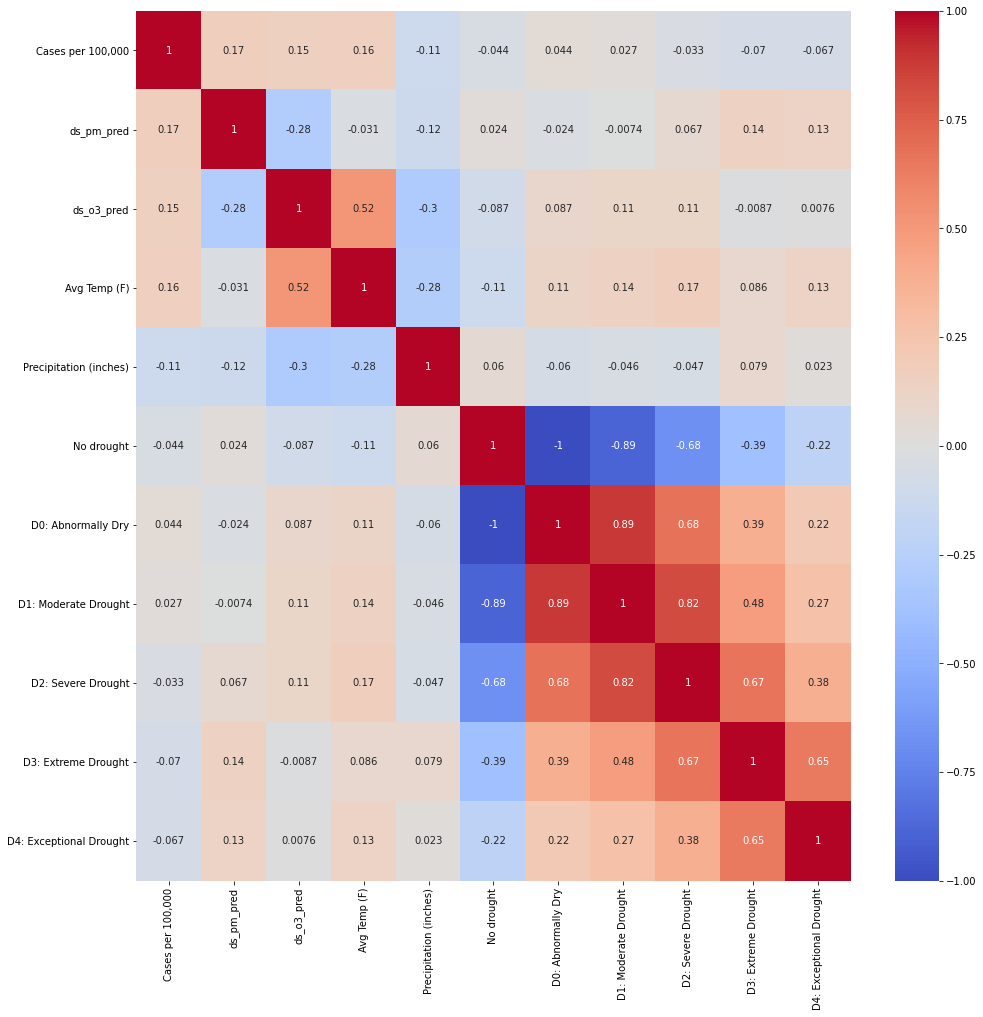

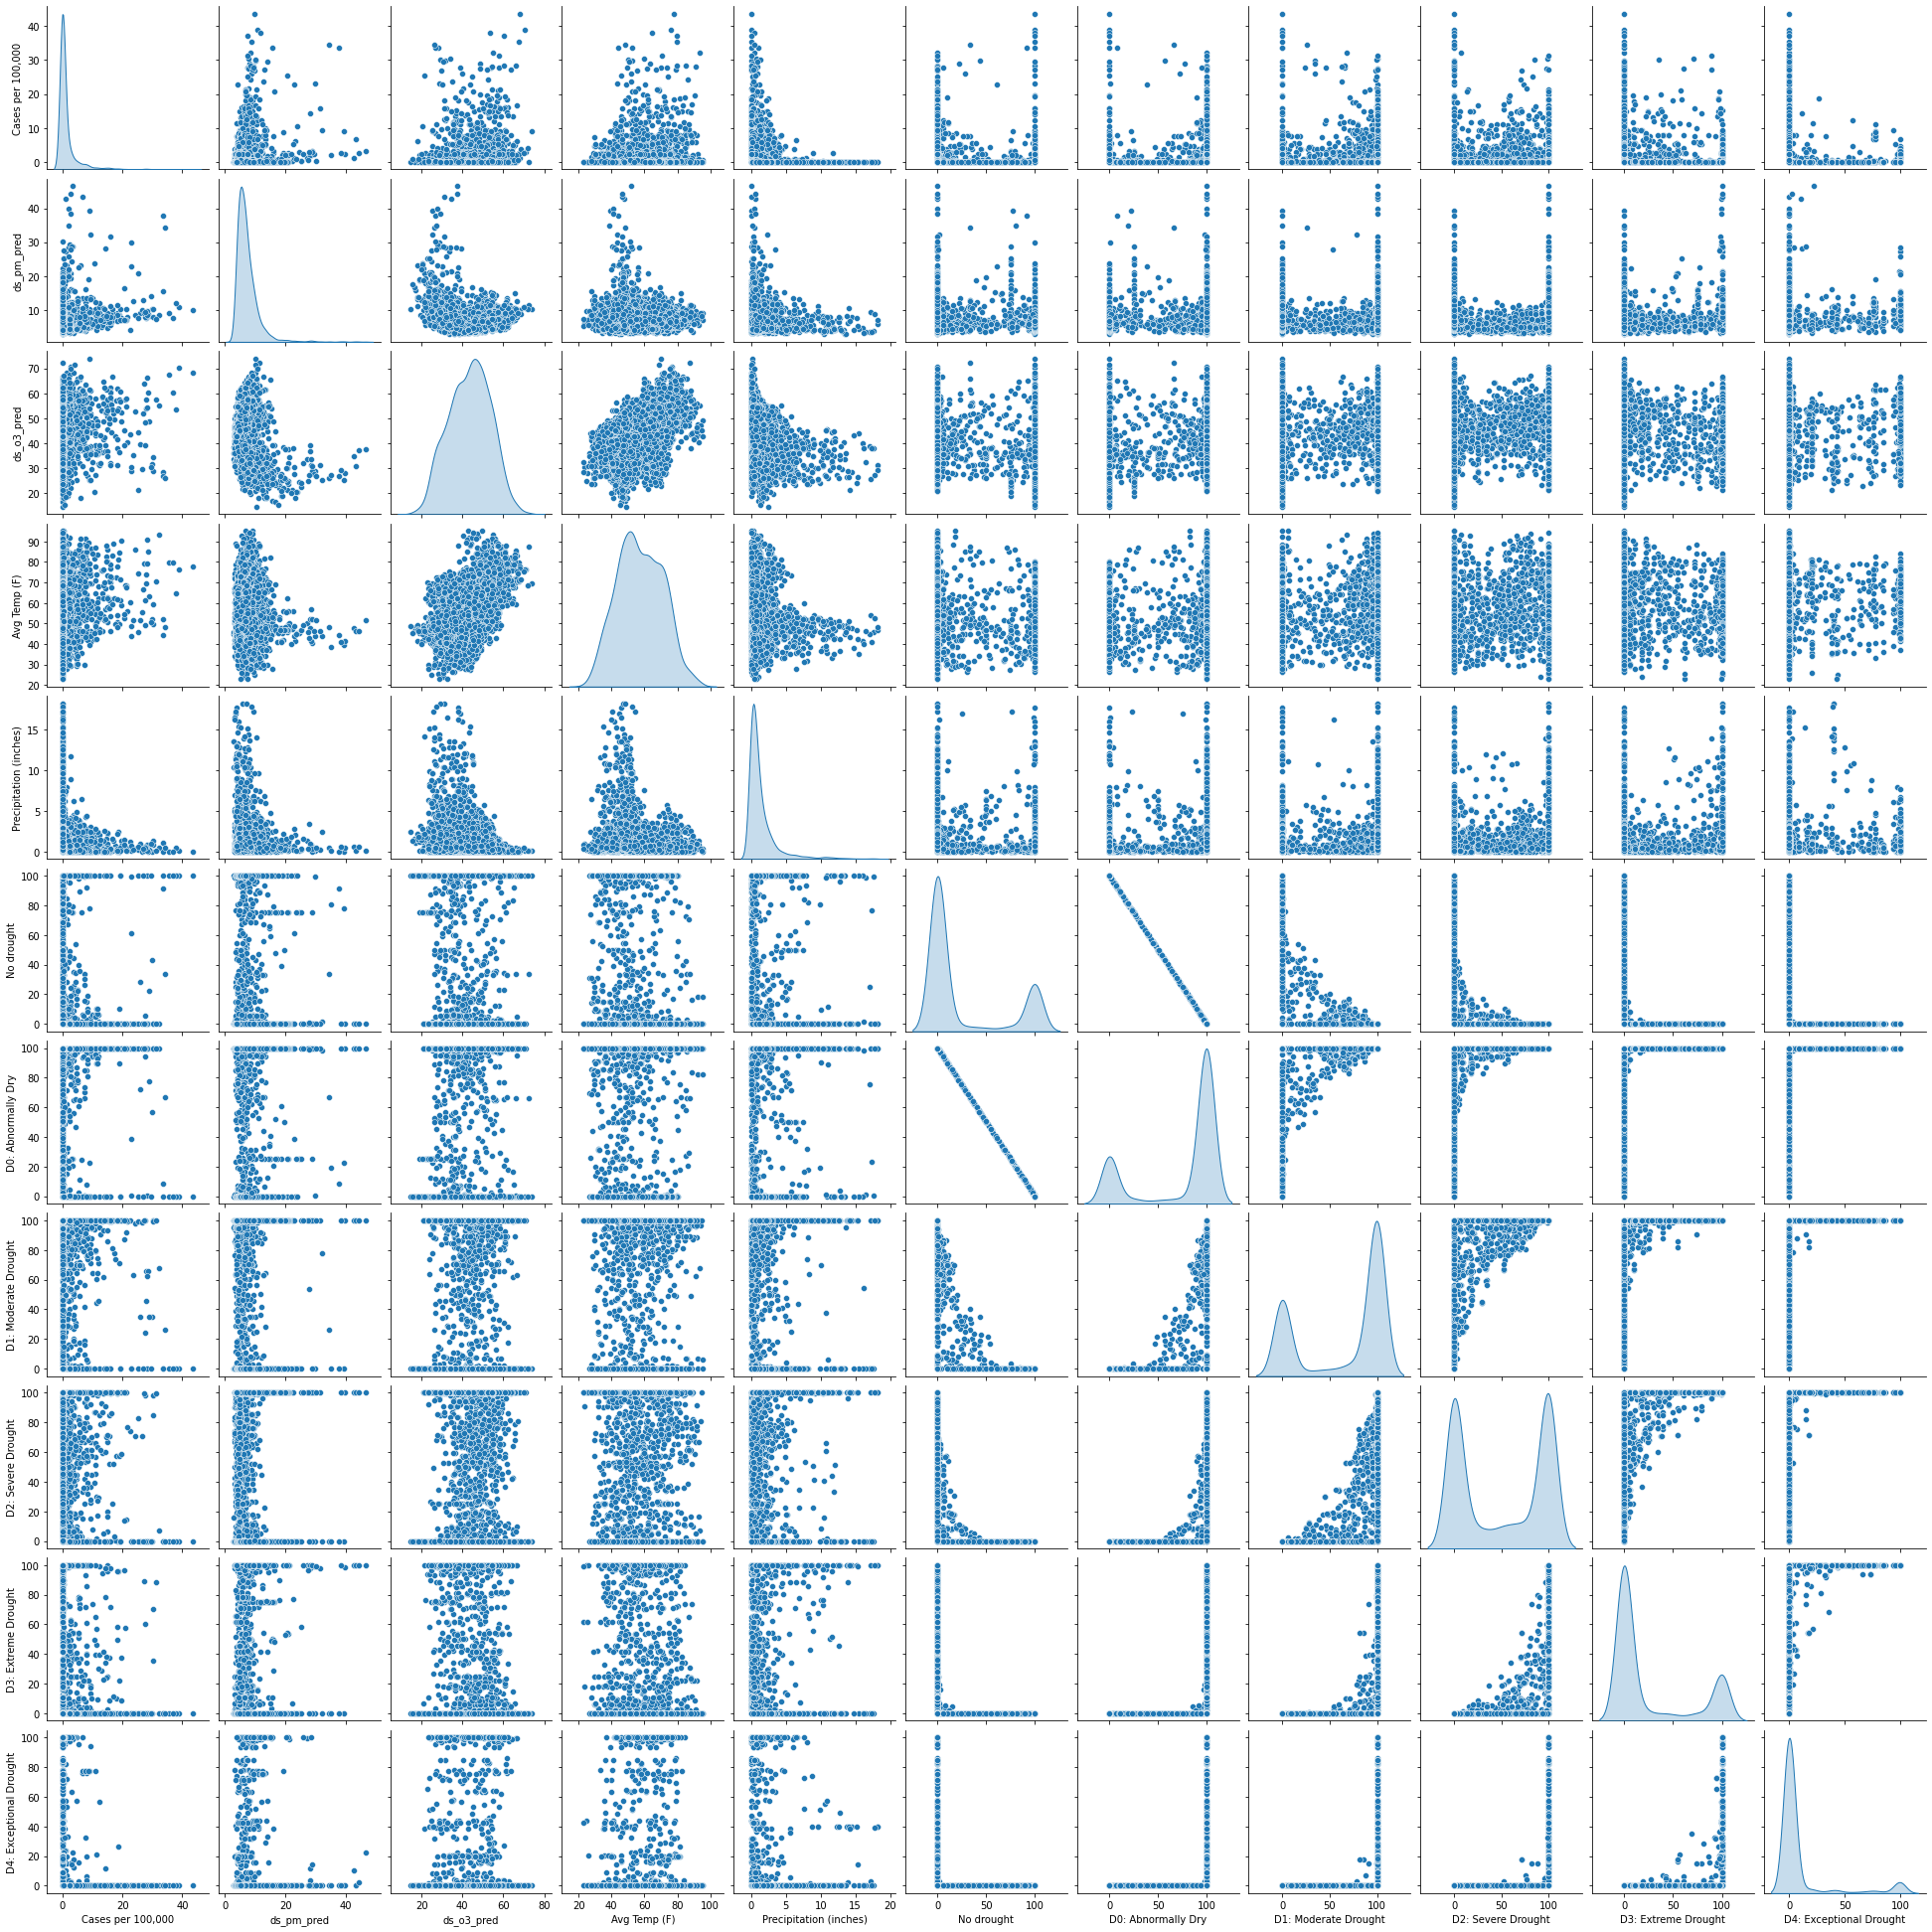

In [60]:

features = ['Cases per 100,000', 'ds_pm_pred', 'ds_o3_pred', 'Avg Temp (F)', 'Precipitation (inches)', 'No drought', 'D0: Abnormally Dry', 'D1: Moderate Drought', 'D2: Severe Drought', 'D3: Extreme Drought', 'D4: Exceptional Drought']

X = final.loc[:, features]

plt.figure(figsize = (16,16))

heatmap = sns.heatmap(data=X.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.2g')

pairplot = sns.pairplot(data=X, kind='scatter', diag_kind='kde')

In [ ]:
heatmap.fig.set_size_inches(15,15)
pairplot

In [68]:
final

,State,County,Date,Cases,statefips,countyfips,Size_x,"Cases per 100,000",Size_y,Size_x,...,ds_pm_pred,ds_o3_pred,Avg Temp (F),Precipitation (inches),No drought,D0: Abnormally Dry,D1: Moderate Drought,D2: Severe Drought,D3: Extreme Drought,D4: Exceptional Drought
0,AZ,Apache,2011-01,1,4,4001,72142,1.386155,72142,72142,...,6.076172,41.927685,28.0,0.20,14.125,85.875,2.4450,0.000,0.00,0.0
1,AZ,Apache,2011-02,1,4,4001,72142,1.386155,72142,72142,...,4.909634,44.829980,31.3,0.59,17.650,82.350,31.3325,0.000,0.00,0.0
2,AZ,Apache,2011-03,0,4,4001,72142,0.000000,72142,72142,...,4.779174,49.993071,43.5,0.37,14.058,85.942,46.7420,7.592,0.00,0.0
3,AZ,Apache,2011-04,3,4,4001,72142,4.158465,72142,72142,...,5.518400,54.441778,48.8,0.44,0.000,100.000,84.9275,38.030,0.00,0.0
4,AZ,Apache,2011-05,3,4,4001,72142,4.158465,72142,72142,...,5.465151,56.371208,53.8,0.58,0.000,100.000,96.9300,40.506,0.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,NV,Washoe,2014-08,1,32,32031,429985,0.232566,429985,429985,...,7.307424,54.216135,68.7,0.90,0.000,100.000,100.0000,100.000,100.00,38.2
2765,NV,Washoe,2014-09,0,32,32031,429985,0.000000,429985,429985,...,16.027222,48.880079,63.6,0.65,0.000,100.000,100.0000,100.000,100.00,38.2
2766,NV,Washoe,2014-10,0,32,32031,429985,0.000000,429985,429985,...,3.976043,42.769662,53.8,0.71,0.000,100.000,100.0000,100.000,100.00,38.2
2767,NV,Washoe,2014-11,0,32,32031,429985,0.000000,429985,429985,...,8.015266,32.095333,40.3,1.25,0.000,100.000,100.0000,100.000,100.00,38.2


In [73]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

ModuleNotFoundError: No module named 'statsmodels'

In [70]:
# No TODOs here: Just examine the code
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.
    
    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """
    
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

In [71]:
# No TODOs here, just run this call and understand what this function is doing.
def compute_OLS_predictions(input_array, input_params):
    """Calculates OLS predictions from fitted OLS parameters, input_params.
    
    Args:
      input_array: numpy array with n entries, where each entry corresponds with a feature value for a given student.
      input_params: numpy array with 2 entries, where the entries are [intercept, beta_hat]. 
        The intercept is a constant term, so the final OLS predictions should be 
        predictions = intercept + beta_hat*input_array.

    Returns:
      numpy array with n entries containing predictions from input_array.
    """
    predictions = input_params[0] + input_params[1] * input_array 
    return predictions

In [72]:
# TODO: Fit OLS parameters to predict X_1 from Z
gamma1_model = fit_OLS_model(final, 'Cases', 'ds_o3_pred', intercept=True) # TODO: fill in
print(gamma1_model.summary())

NameError: name 'sm' is not defined

In [ ]:
# Compute predictions for number of books read
intercept_OLS = gamma1_model.params[0]
gamma1_OLS = gamma1_model.params[1]
X_1_hat = intercept_OLS + gamma1_OLS*student_data['ReadathonDuration']

# Add the predictions to the student_data dataframe
student_data['PredictedNumBooks'] = X_1_hat
student_data.head()

In [ ]:
# TODO: Fit OLS parameters to predict Y from the predicted X_1_hat.
beta1_model = fit_OLS_model(student_data, 'SAT', 'PredictedNumBooks', intercept=True)
print(beta1_model.summary())

In [175]:
final['Year'] = final['Date'].dt.year
final['Month'] = final['Date'].dt.month

In [176]:
final

,State,County,Date,Cases,statefips,countyfips,Size_x,"Cases per 100,000",Size_y,Size_x,...,Avg Temp (F),Precipitation (inches),No drought,D0: Abnormally Dry,D1: Moderate Drought,D2: Severe Drought,D3: Extreme Drought,D4: Exceptional Drought,Year,Month
0,AZ,Apache,2011-01,1,4,4001,72142,1.386155,72142,72142,...,28.0,0.20,14.125,85.875,2.4450,0.000,0.00,0.0,2011,1
1,AZ,Apache,2011-02,1,4,4001,72142,1.386155,72142,72142,...,31.3,0.59,17.650,82.350,31.3325,0.000,0.00,0.0,2011,2
2,AZ,Apache,2011-03,0,4,4001,72142,0.000000,72142,72142,...,43.5,0.37,14.058,85.942,46.7420,7.592,0.00,0.0,2011,3
3,AZ,Apache,2011-04,3,4,4001,72142,4.158465,72142,72142,...,48.8,0.44,0.000,100.000,84.9275,38.030,0.00,0.0,2011,4
4,AZ,Apache,2011-05,3,4,4001,72142,4.158465,72142,72142,...,53.8,0.58,0.000,100.000,96.9300,40.506,0.94,0.0,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,NV,Washoe,2014-08,1,32,32031,429985,0.232566,429985,429985,...,68.7,0.90,0.000,100.000,100.0000,100.000,100.00,38.2,2014,8
2765,NV,Washoe,2014-09,0,32,32031,429985,0.000000,429985,429985,...,63.6,0.65,0.000,100.000,100.0000,100.000,100.00,38.2,2014,9
2766,NV,Washoe,2014-10,0,32,32031,429985,0.000000,429985,429985,...,53.8,0.71,0.000,100.000,100.0000,100.000,100.00,38.2,2014,10
2767,NV,Washoe,2014-11,0,32,32031,429985,0.000000,429985,429985,...,40.3,1.25,0.000,100.000,100.0000,100.000,100.00,38.2,2014,11


In [179]:
# TODO: fill in
from sklearn.model_selection import train_test_split

# TODO: fill in
train, test = train_test_split(final, test_size = .3)


In [180]:
train.columns

Index(['State', 'County', 'Date', 'Cases', 'statefips', 'countyfips', 'Size_x',
       'Cases per 100,000', 'Size_y', 'Size_x', 'Size_y', 'ds_pm_pred',
       'ds_o3_pred', 'Avg Temp (F)', 'Precipitation (inches)', 'No drought',
       'D0: Abnormally Dry', 'D1: Moderate Drought', 'D2: Severe Drought',
       'D3: Extreme Drought', 'D4: Exceptional Drought', 'Year', 'Month'],
      dtype='object')

In [246]:
X = train[['Year', 'Month', 'ds_pm_pred', 'ds_o3_pred', 'Avg Temp (F)', 'Precipitation (inches)']]
# TODO: fill in
y = train['Cases per 100,000']

In [247]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(max_features=1) # TODO: fill in
forest_model.fit(X, y)  # TODO: fill in

train["forest_pred"] = forest_model.predict(X) # TODO: fill in
test["forest_pred"] = forest_model.predict(test[['Year', 'Month', 'ds_pm_pred',
       'ds_o3_pred', 'Avg Temp (F)', 'Precipitation (inches)', ]]) # TODO: fill in

C:\Users\cheah\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cheah\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [248]:
train_rmse = np.mean((train["forest_pred"] - train['Cases per 100,000']) ** 2) ** 0.5
test_rmse = np.mean((test["forest_pred"] - test['Cases per 100,000']) ** 2) ** 0.5

In [249]:
train_rmse

1.4799610217908634

In [250]:
test_rmse

3.487340786827239

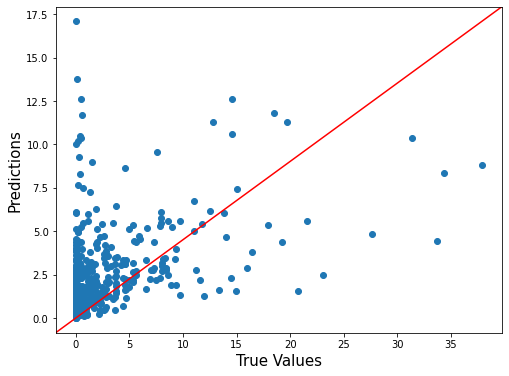

In [251]:
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(test["Cases per 100,000"], test['forest_pred'])
ax.plot([0, 1], [0, 1], transform=ax.transAxes, c="red")
ax.set_ylabel('Predictions',fontsize=15);
ax.set_xlabel('True Values',fontsize=15);
